# SciPy

![scipy logo](./figures/scipy.jpeg)
&nbsp;

<center>**Loic Gouarin**</center>
<center>11 juillet 2017</center>

&nbsp;

Scipy étend les possibilités de NumPy en proposant des sous packages par thématique

- interpolation
- intégraiton
- matrice creuse et algèbre linéaire
- optimisation
- traitement du signal
- traitement d'images

## Les matrices creuses

Scipy offre un ensemble de format pour représenter les matrices creuses.

- format diagonal (**dia**)
- format liste de listes (**lil**)
- format dictionnaire de clés (**dok**)
- format coordonnées (**coo**)
- format creux compressé par ligne (**csr**)
- format creux compressé par colonne (**csc**)
- format block compressé par ligne (**bsr**)

## Format dia

In [6]:
import numpy as np
from scipy import sparse
data = np.arange(12).reshape((3, 4)) + 1
data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [7]:
offsets = np.array([0, -1, 2])

In [11]:
mtx = sparse.dia_matrix((data, offsets), shape=(4, 4))
print(mtx)

  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (1, 0)	5
  (2, 1)	6
  (3, 2)	7
  (0, 2)	11
  (1, 3)	12


In [14]:
mtx.todense()

matrix([[ 1,  0, 11,  0],
        [ 5,  2,  0, 12],
        [ 0,  6,  3,  0],
        [ 0,  0,  7,  4]])

#### Explication

![dia](./figures/dia.png)

## Format lil

In [21]:
mtx = sparse.lil_matrix((4, 5))
mtx[::2, [1, 2, 4]] = [1, 2, 3]
mtx.todense()

matrix([[ 0.,  1.,  2.,  0.,  3.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  0.,  3.],
        [ 0.,  0.,  0.,  0.,  0.]])

## Format csr

In [23]:
mtx = sparse.csr_matrix((3, 4), dtype=np.int8)
mtx.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

In [25]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csr_matrix((data, (row, col)), shape=(3, 3))
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]], dtype=int64)

In [27]:
data = np.array([1, 2, 3, 4, 5, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
mtx = sparse.csr_matrix((data, indices, indptr), shape=(3, 3))
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]])

## Laplacien 1D

$$
\left\{
\begin{array}{l}
-\Delta u = 1 \quad \text{pour} \quad x\in[0, 1] \\
u(x=0) = u(x=1) = 0
\end{array}
\right.
$$

In [64]:
n = 200
h = 1./(n+1)

A = 1/h**2*sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n, n))
A.todense()

matrix([[ 80802., -40401.,      0., ...,      0.,      0.,      0.],
        [-40401.,  80802., -40401., ...,      0.,      0.,      0.],
        [     0., -40401.,  80802., ...,      0.,      0.,      0.],
        ..., 
        [     0.,      0.,      0., ...,  80802., -40401.,      0.],
        [     0.,      0.,      0., ..., -40401.,  80802., -40401.],
        [     0.,      0.,      0., ...,      0., -40401.,  80802.]])

In [65]:
b = np.ones(n)

#### Solveur direct

- solveur par défaut: SuperLU
- peut-être utilisé avec umfpack

In [77]:
from scipy.sparse.linalg import dsolve

##### Avec SuperLU

In [78]:
x = dsolve.spsolve(A.tocsc(), b)

##### Avec umfpack

In [76]:
x = dsolve.spsolve(A.tocsc(), b, use_umfpack=True)

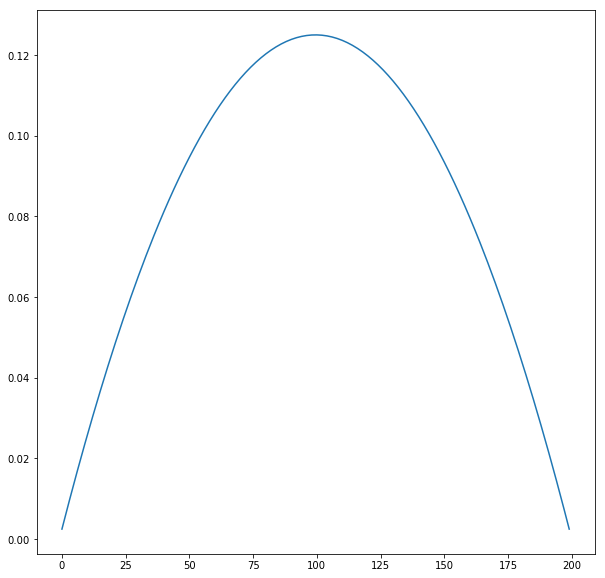

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(x)
plt.show()

#### Solveurs itératifs

- bicg (BIConjugate Gradient)
- bicgstab (BIConjugate Gradient STABilized)
- cg (Conjugate Gradient) - symmetric positive definite matrices only
- cgs (Conjugate Gradient Squared)
- gmres (Generalized Minimal RESidual)
- minres (MINimum RESidual)
- qmr (Quasi-Minimal Residual)

In [89]:
from scipy.sparse.linalg import isolve
from numpy.linalg import norm

In [92]:
k, r0 = 0, 0.
def my_callback(xk):
    global k, r0
    if k == 0:
        r0 = norm(A*xk - b)
    print(f"iteration {k} -> residu = {norm(A*xk - b)/r0}")
    k += 1
    
x, info = isolve.cg(A, b, callback=my_callback)

iteration 0 -> residu = 1.0
iteration 1 -> residu = 0.9899494936611666
iteration 2 -> residu = 0.9798989846928204
iteration 3 -> residu = 0.9698484730132129
iteration 4 -> residu = 0.9597979585371716
iteration 5 -> residu = 0.9497474411759168
iteration 6 -> residu = 0.9396969208368745
iteration 7 -> residu = 0.9296463974234637
iteration 8 -> residu = 0.9195958708348813
iteration 9 -> residu = 0.9095453409658742
iteration 10 -> residu = 0.8994948077064759
iteration 11 -> residu = 0.8894442709417556
iteration 12 -> residu = 0.879393730551528
iteration 13 -> residu = 0.8693431864100483
iteration 14 -> residu = 0.859292638385689
iteration 15 -> residu = 0.8492420863405918
iteration 16 -> residu = 0.8391915301302919
iteration 17 -> residu = 0.8291409696033285
iteration 18 -> residu = 0.8190904046007931
iteration 19 -> residu = 0.8090398349558906
iteration 20 -> residu = 0.7989892604934324
iteration 21 -> residu = 0.7889386810292942
iteration 22 -> residu = 0.7788880963698616
iteration 23 ->

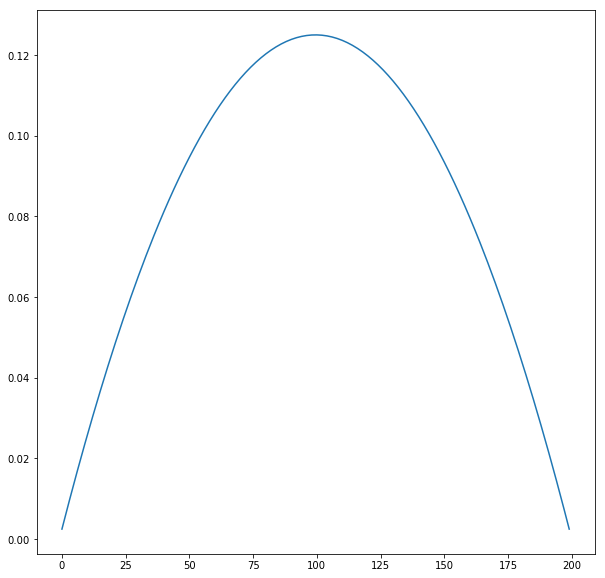

In [94]:
plt.figure(figsize=(10, 10))
plt.plot(x)
plt.show()

In [97]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom.css").read()
    return HTML(styles)
css_styling()